In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import tensorflow as tf
import tensorflow_datasets as tfds
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# 프로젝트 1_1
### 고해상도 이미지를 불러와 저해상도로 변환하고 SRGAN과 Bicubic 적용

# 이미지 불러오기

12000000


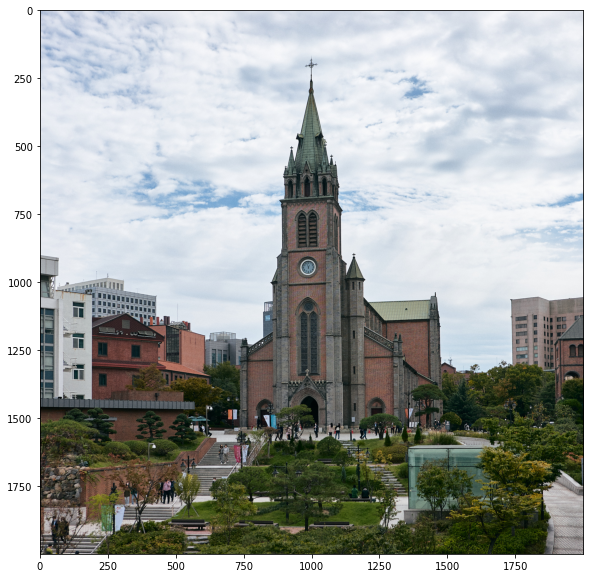

In [2]:
image_path_1 = cv2.imread(os.getenv('HOME')+'/aiffel/exp16/images/image1.jpg')
hr_image_1 = cv2.cvtColor(image_path_1, cv2.COLOR_BGR2RGB)

print(hr_image_1.size)
plt.figure(figsize=(30,10))
plt.imshow(hr_image_1)

(500, 500, 3)


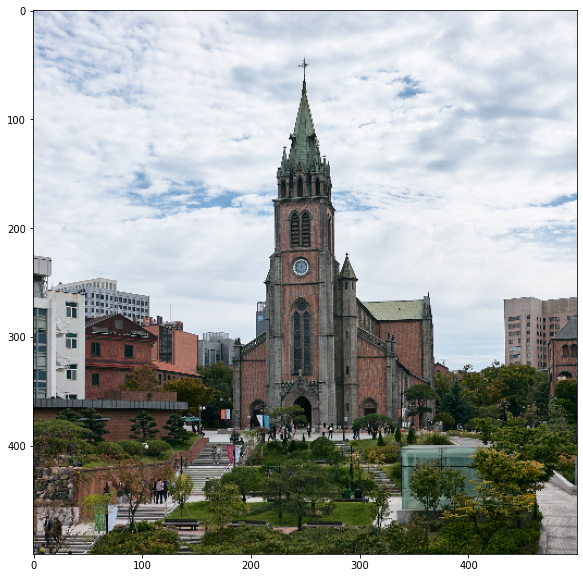

In [3]:
lr_image_1 = cv2.resize(hr_image_1, dsize=(hr_image_1.shape[1]//4, hr_image_1.shape[0]//4))

print(lr_image_1.shape)

plt.figure(figsize=(20,10))
plt.imshow(lr_image_1)

# SRGAN 모델 불러오기

In [4]:
srgan_path = os.getenv('HOME') + '/aiffel/exp16/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(srgan_path)

In [5]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    s = srgan.predict(image)
    s = tf.clip_by_value(s, 0, 255)
    s = tf.round(s)
    s = tf.cast(s, tf.uint8)
    return np.array(s)[0]

# SRGAN 적용

In [6]:
srgan_hr_1 = apply_srgan(lr_image_1)

# Bicubic 적용

In [7]:
bicubic_hr_1 = cv2.resize(lr_image_1, dsize=(hr_image_1.shape[1], hr_image_1.shape[0]), interpolation=cv2.INTER_CUBIC)

# 이미지 비교

/opt/conda/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


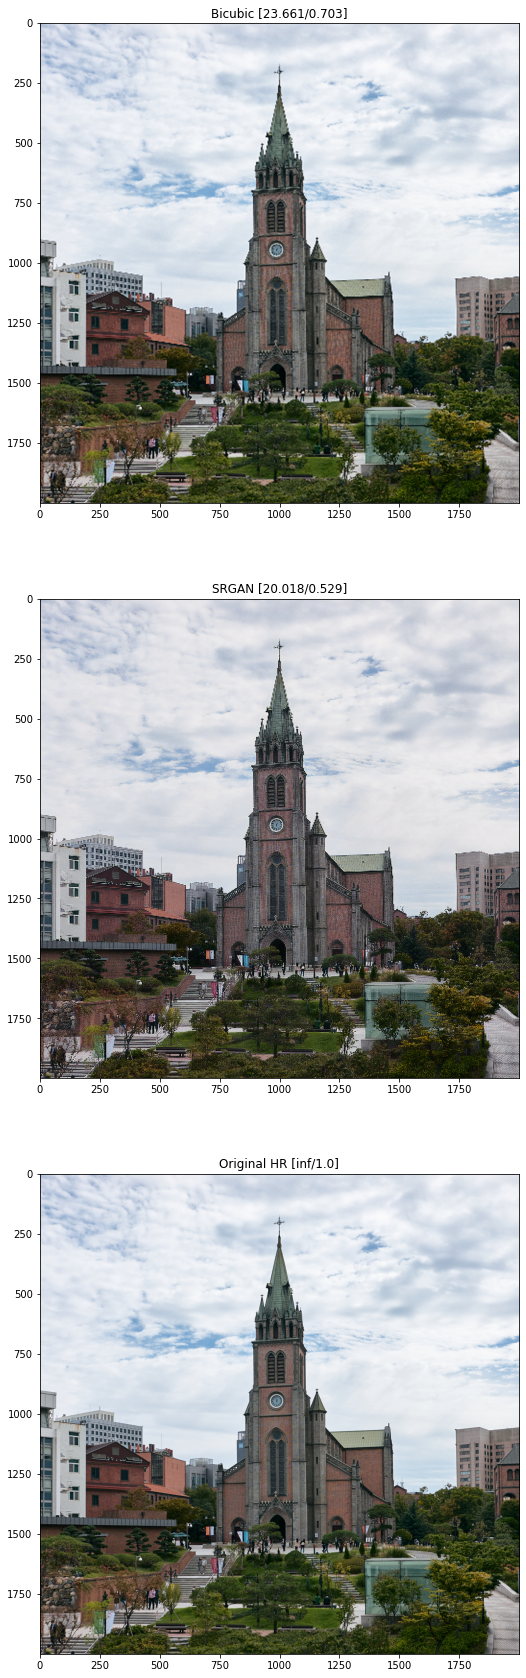

In [8]:
temp = [bicubic_hr_1, srgan_hr_1, hr_image_1]
titles = ["Bicubic", "SRGAN", "Original HR"]

psnr = [round(peak_signal_noise_ratio(hr_image_1, i), 3) for i in temp]
ssim = [round(structural_similarity(hr_image_1, i, multichannel=True), 3) for i in temp]

plt.figure(figsize=(30,30))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.imshow(temp[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=12)

In [9]:
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# 크롭 이미지 비교

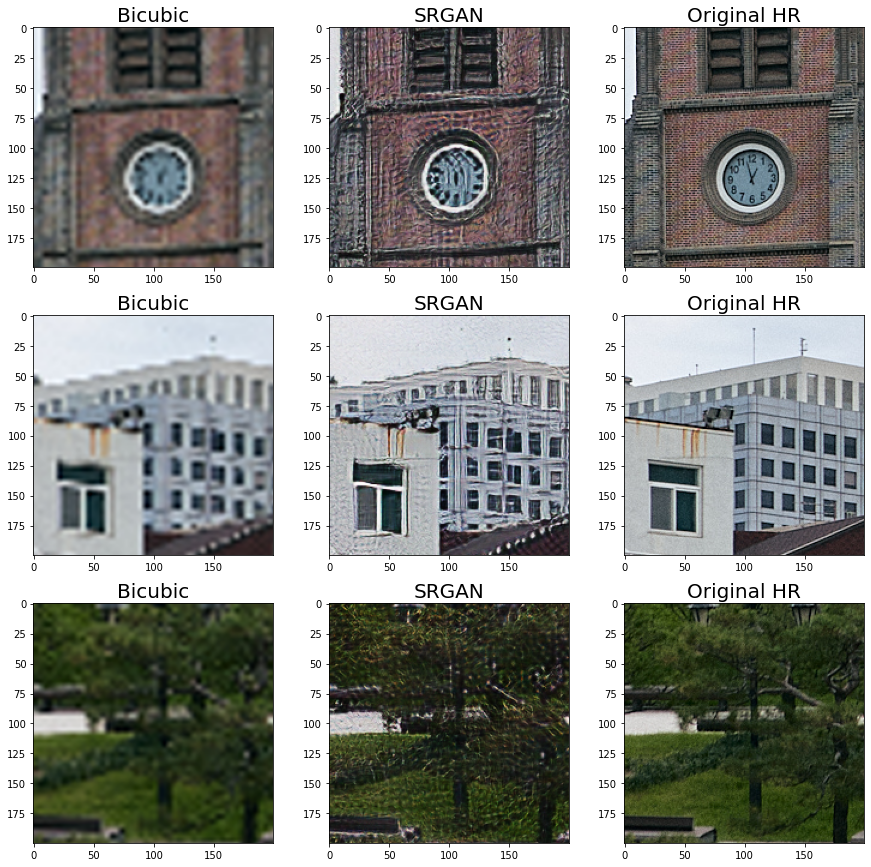

In [10]:
left_tops = [(820,880),(950,100),(1700, 800)]

temp = []
for left_top in left_tops:
    temp1 = crop(bicubic_hr_1, left_top, 200, 200)
    temp2 = crop(srgan_hr_1 , left_top, 200, 200)
    temp3 = crop(hr_image_1, left_top, 200, 200)
    temp.extend([temp1, temp2, temp3])
    
labels = ["Bicubic", "SRGAN", "Original HR"] * 3

plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(temp[i])
    plt.title(labels[i], fontsize=20)

***

# 프로젝트 1_2
### 저해상도 이미지를 불러와 SRGAN과 Bicubic 적용

# 이미지 불러오기

750000


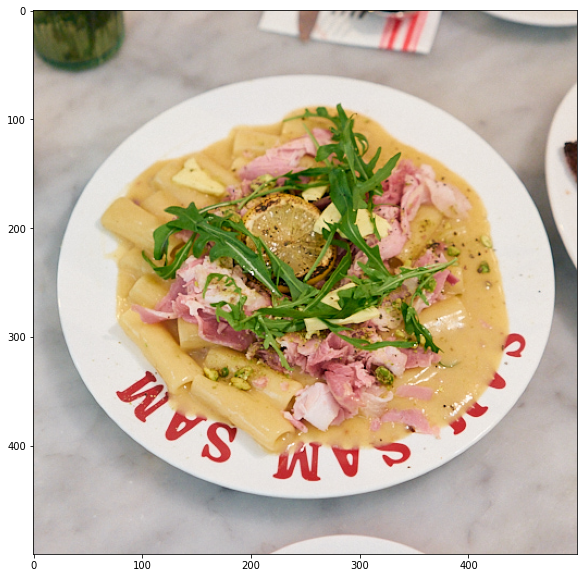

In [11]:
image_path_2 = cv2.imread(os.getenv('HOME')+'/aiffel/exp16/images/image2.jpg')
lr_image_2 = cv2.cvtColor(image_path_2, cv2.COLOR_BGR2RGB)

print(lr_image_2.size)
plt.figure(figsize=(30,10))
plt.imshow(lr_image_2)

# SRGAN 적용

In [12]:
srgan_hr_2 = apply_srgan(lr_image_2)

# Bicubic 적용

In [13]:
bicubic_hr_2 = cv2.resize(lr_image_2, dsize=(lr_image_2.shape[1]*4, lr_image_2.shape[0]*4), interpolation=cv2.INTER_CUBIC)

# 이미지 비교

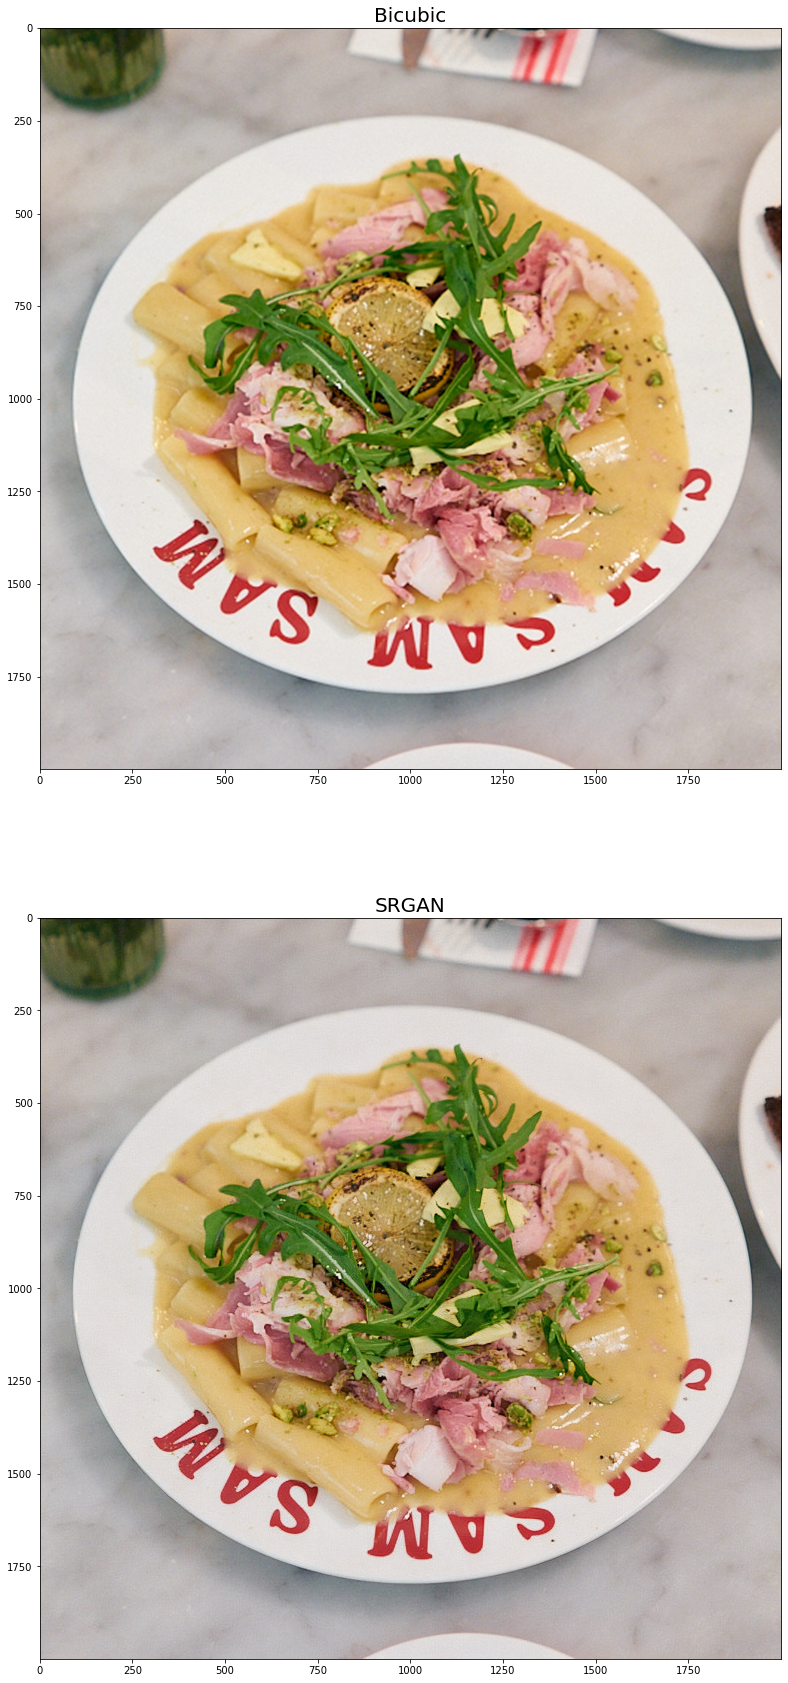

In [14]:
temp = [bicubic_hr_2, srgan_hr_2]
titles = ["Bicubic", "SRGAN"]

plt.figure(figsize=(30,30))
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.imshow(temp[i])
    plt.title(titles[i], fontsize=20)

# 크롭 이미지 비교

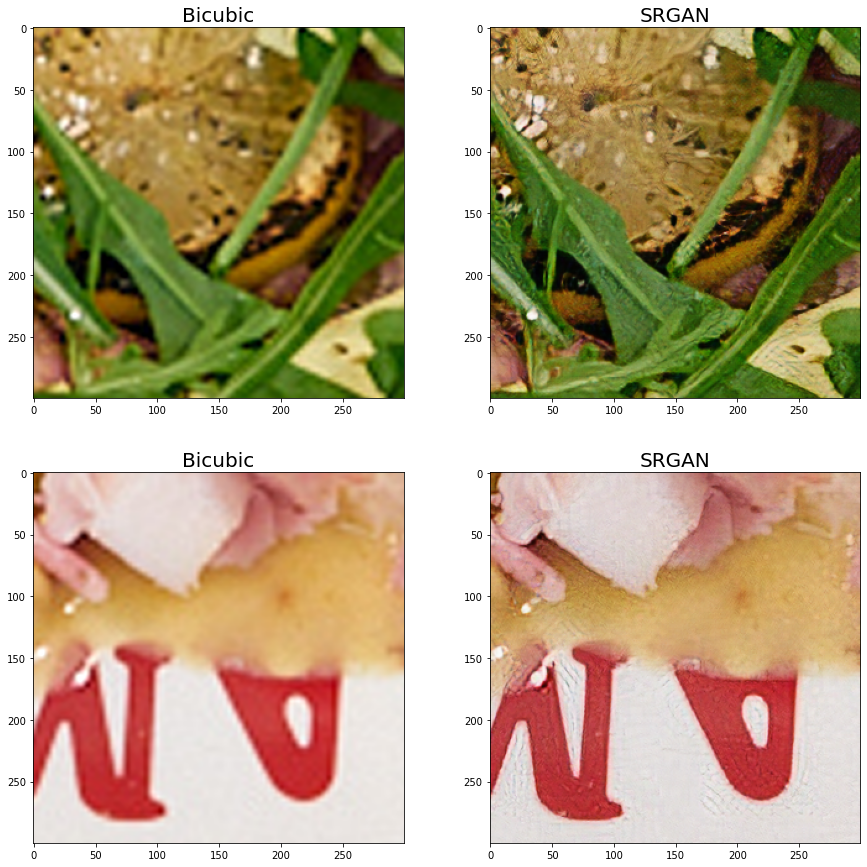

In [15]:
left_tops = [(800,850),(1450,950)]

temp = []
for left_top in left_tops:
    temp1 = crop(bicubic_hr_2, left_top, 300, 300)
    temp2 = crop(srgan_hr_2 , left_top, 300, 300)
    temp.extend([temp1, temp2])
    
labels = ["Bicubic", "SRGAN"] * 2

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(temp[i])
    plt.title(labels[i], fontsize=20)

***

# 프로젝트 2
### GIF 파일에 SRGAN과 Bicubic 적용

# 부득이하게 GIF 파일이 커서 용량을 줄인 후 진행

# GIF 파일 불러오기

In [16]:
gif = cv2.VideoCapture(os.getenv('HOME')+'/aiffel/exp16/images/gif.gif')

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)


print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 48
frame 크기 : (472, 846, 3)


# SRGAN 적용

In [17]:
frames_sr = []
for frame in frames:
    frame_sr = apply_srgan(frame)
    frames_sr.append(frame_sr)
    
imageio.mimsave("srgan.gif", frames_sr)

# Bicubic 적용

In [18]:
frames_bicubic = []
for frame in frames:
    frame_bicubic = cv2.resize(
        frame,
        dsize = (frame.shape[1]*4, frame.shape[0]*4),
        interpolation = cv2.INTER_CUBIC
    )
    frames_bicubic.append(frame_bicubic)
    
imageio.mimsave("bicubic.gif", frames_bicubic)

In [19]:
from IPython.display import Image as show_gif

# 원본 GIF

![원본 GIF](https://8888-w1rc68jukld129tcs3bft4mxh.c2.prod.connect.ainize.ai/view/aiffel/exp16/images/gif.gif "원본 GIF")

https://8888-w1rc68jukld129tcs3bft4mxh.c2.prod.connect.ainize.ai/view/aiffel/exp16/images/gif.gif

# SRGAN GIF

![SRGAN GIF](https://8888-w1rc68jukld129tcs3bft4mxh.c2.prod.connect.ainize.ai/view/aiffel/exp16/images/srgan.gif "SRGAN GIF")

https://8888-w1rc68jukld129tcs3bft4mxh.c2.prod.connect.ainize.ai/view/aiffel/exp16/images/srgan.gif

# Bicubic GIF

![Bicubic GIF](https://8888-w1rc68jukld129tcs3bft4mxh.c2.prod.connect.ainize.ai/view/aiffel/exp16/images/bicubic.gif "Bicubic GIF")

https://8888-w1rc68jukld129tcs3bft4mxh.c2.prod.connect.ainize.ai/view/aiffel/exp16/images/bicubic.gif

***

# 고찰
  
일반적인 경우 Bicubic보다 SRGAN의 성능이 더 좋은 것을 확인할 수 있었습니다.  
  
특히 SRGAN의 경우 경계선의 표현력이 좋아지는 것을 볼 수 있었습니다.  
  
다만 이러한 SRGAN도 미세한 패턴이 반복되는 영역에 대해서는 복원된 이미지의 디테일이 무너졌고 색 또한 많이 뒤틀렸습니다.  
  
미세한 디테일이 반복되는 이미지의 경우에는 적용시에 조심할 필요가 있어보입니다.  
  
일정한 프레임으로 이루어진 GIF 파일도 Bicubic과 SRGAN이 모두 잘 적용되는 것을 확인할 수 있었습니다.  
  
사진과 마찬가지로 SRGAN을 적용했을 때 경계선의 표현력이 좋아졌음을 느꼈습니다.  
  
또한, GIF 파일도 조밀한 패턴의 영역에서 디테일이 무너지는 경향을 확인했습니다.  
  
더불어 GIF 파일의 경우 해상력 복원 과정을 거치면서 색 뒤틀림과 노이즈가 도드라져 보이는 경우가 생겼는데 아마 GIF 특성상 애초에 노이즈가 많은 이미지이다 보니 사진과 비슷한 이유로 색 뒤틀림이 발생한 것이 아닌가 싶습니다.